## Report on study of salaries in El Salvador 

According to the University of Dartmouth: El Salvador is one of the poorest countries in the western hemisphere, with low per capita income, chronic inflation, and high unemployment. The nation's economy traditionally depends heavily on coffee, although today (2006) remittances from over 2,000,000 Salvadorans working abroad are a major source of income. 

The present work studies the relationship between salary and other factors such as gender, last level of studies approved, remittances, and so on. 

## Research question


* Is there a gender pay gap in El Salvador?
* Is there an association between last level of studies approved and salary in El Salvador?
* What features have the biggest importance on predicting salary in El Salvador? 

## Prepare data

### Gather data  

We used data from the EHPM (Spanish acronym) 2017, this survey was conducted by The General Directorate of Statistics and Censuses, Digestyc (Spanish acronym). The total sample was of 19968 homes distributed in the whole territory of El Salvador. The data can be obtained in the following link: 

https://datos.gob.sv/dataset/encuesta-hogares-propositos-multiples


In [1]:
"""Importing libraries """

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats
sns.set(style="ticks", color_codes=True)

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer 
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest

import eli5
from eli5.sklearn import PermutationImportance


/opt/conda/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future versi

In [2]:
"""Loading the data """

df = pd.read_csv("../input/ehpm-2017/ehpm-2017.csv", na_values=' ')

In [3]:
df.head()

,edicion,lote,tipo,folio,viv,r101,idboleta,fac00,area,region,...,r1119_9,r1119_10,r1119_11,r1119_11_otr,control1120,r1120_1,r1120_2,r1120_3,r1120_4,r1120_5
0,2017,19,0,36.0,0,1,163037,111,1,1,...,2.0,2.0,2.0,NaN,1,1.0,1.0,1.0,2.0,2.0
1,2017,19,0,36.0,0,2,163037,111,1,1,...,2.0,2.0,2.0,NaN,1,1.0,1.0,1.0,2.0,2.0
2,2017,19,0,36.0,0,3,163037,111,1,1,...,2.0,2.0,2.0,NaN,1,1.0,1.0,1.0,2.0,2.0
3,2017,19,0,36.0,0,4,163037,111,1,1,...,2.0,2.0,2.0,NaN,1,1.0,1.0,1.0,2.0,2.0
4,2017,19,0,36.0,0,5,163037,111,1,1,...,2.0,2.0,2.0,NaN,1,1.0,1.0,1.0,2.0,2.0


In [4]:
df.shape

(75133, 813)

The original dataset has 813 variables and 75133 observations. In order to answer the research question we will work with the following variables: 

* r104:  gender 
* r106: age 
* r107: marital status 
* r215: last level of studies approved
* r32601a: he [or she] has radio 
* r32603a: he [or she] has tv
* r32605a: he [or she] has refrigerator
* r32606a: he [or she] has washing machine 
* r32609a: he [or she] has computer
* r32610a: he [or she] has dryer
* r32611a: he [or she] has sewing machine 
* r32612a: he [or she] has car
* r32616a: he [or she] has electricy generator 
* r32617a: he [or she] has air conditional
* r32619a: he [or she] has motorcycle
* r442: works in the private or public sector
* r7041a: remittance in cash
* r7041b: remittance transfers
* r706e: remittance in kind 
* r424: salary

In [5]:
selected_variables = [ 'r104', 'r106', 'r107', 'r215a', 'r32601a', 
                       'r32603a', 'r32605a',  'r32606a',  'r32609a', 
                       'r32610a',  'r32611a', 'r32612a',  'r32616a',  
                       'r32617a',  'r32619a', 'r442',  'r7041a', 
                       'r7041b',  'r706e',  'r424'
                     ]

df = df[selected_variables]

The dataset uses a numeric codification for categorical variables,for example gender utilizes the following codes: 1 Male and 2 Female. We will convert the following variables into categorical using the method Categorical from pandas.

* r104:  gender 
* r107: marital status 
* r215a: last level of studies approved
* r32601a: he [or she] has radio 
* r32603a: he [or she] has a tv
* r32605a: he [or she] has a refrigerator
* r32606a: he [or she] has a washing machine 
* r32609a: he [or she] has a computer
* r32610a: he [or she] has a dryer
* r32611a: he [or she] has a sewing machine 
* r32612a: he [or she] has a car
* r32616a: he [or she] has a electricy generator 
* r32617a: he [or she] has a air conditional
* r32619a: he [or she] has a motorcycle
* r442: works in private or public sector


In [6]:
df["r104"] = pd.Categorical(df.r104)
df["r107"] = pd.Categorical(df.r107)
df["r215a"] = pd.Categorical(df.r215a)
df["r32601a"] = pd.Categorical(df.r32601a)
df["r32603a"] = pd.Categorical(df.r32603a)
df["r32605a"] = pd.Categorical(df.r32605a)
df["r32606a"] = pd.Categorical(df.r32606a)
df["r32609a"] = pd.Categorical(df.r32609a)
df["r32610a"] = pd.Categorical(df.r32610a)
df["r32611a"] = pd.Categorical(df.r32611a)
df["r32612a"] = pd.Categorical(df.r32612a)
df["r32616a"] = pd.Categorical(df.r32616a)
df["r32617a"] = pd.Categorical(df.r32617a)
df["r32619a"] = pd.Categorical(df.r32619a)
df["r442"] = pd.Categorical(df.r442)

### Handle missing and categorical data 

In [7]:
''' Percentage of missing values in the variable salary '''

df["r424"].isnull().sum() / df.shape[0]

0.7597194308759134

In order to avoid any kind of bias due to the lack of response we will remove missing values in the salary variable with the following code.

In [8]:
df = df.dropna(subset=['r424'])

With the above operation we have removed 76% of the original data. Then, we will select only people with salary > 0 and age >= 18 (adult) with the following code.

In [9]:
df = df[ (df["r106"] >=18)  & (df["r424"] > 0) ]

 After that, we will calculate the percentage of missing in each variable.

In [10]:
df.isnull().sum() / df.shape[0]

r104       0.000000
r106       0.000000
r107       0.000000
r215a      0.092159
r32601a    0.000000
r32603a    0.000000
r32605a    0.000000
r32606a    0.000000
r32609a    0.000000
r32610a    0.000000
r32611a    0.000000
r32612a    0.000000
r32616a    0.000000
r32617a    0.000000
r32619a    0.000000
r442       1.000000
r7041a     0.848933
r7041b     0.848933
r706e      0.977104
r424       0.000000
dtype: float64

We will remove the r442 variable which is "works in private or public sector" since that all values are missing. The variables related to remittance have many missing values and because of that we will combine them into one variable.

In [11]:
df = df.drop(['r442'], axis=1)

In [12]:
vars_to_combine = ['r7041a', 'r7041b', 'r706e']
df['remittance'] = df.loc[:, vars_to_combine].sum(axis=1)

#if we sum three na the value must be na but with the 
# code above the result is 0 that is why we need to run the
# following code.

df.loc[df[vars_to_combine].isnull().sum(axis=1) == 3, ['remittance']] = np.nan

In [13]:
df["remittance"].isnull().sum()/df.shape[0]

0.8450209975263188

According to the cell above 84% of the people do not receive remittance or do not give information about it. 

We do not need anymore the variables related to remittance.

In [14]:
df = df.drop(['r7041a', 'r7041b', 'r706e'], axis=1)

We will explore categorical variables that has few data in their corresponding categories.


In [15]:
df_temp = df.select_dtypes(include=['category'])

In [16]:
for col in df_temp.columns:     
    print(df_temp[col].value_counts())
    

1    11240
2     6143
Name: r104, dtype: int64
6.0    4972
2.0    4891
1.0    4669
5.0    2376
3.0     306
4.0     169
Name: r107, dtype: int64
2.0    8087
3.0    5124
4.0    1849
5.0     443
8.0     273
6.0       4
0.0       1
1.0       0
Name: r215a, dtype: int64
2    12501
1     4882
Name: r32601a, dtype: int64
1    15462
2     1921
Name: r32603a, dtype: int64
1    12361
2     5022
Name: r32605a, dtype: int64
2    14459
1     2924
Name: r32606a, dtype: int64
2    14306
1     3077
Name: r32609a, dtype: int64
2    17248
1      135
Name: r32610a, dtype: int64
2    16066
1     1317
Name: r32611a, dtype: int64
2    14273
1     3110
Name: r32612a, dtype: int64
2    17368
1       15
Name: r32616a, dtype: int64
2    17198
1      185
Name: r32617a, dtype: int64
2    15930
1     1453
Name: r32619a, dtype: int64


We will drop r32616a variable which indicates if the person has electricy generator since that there are only 15 persons that has an electricy generator. Moreover, we will delete rows that has values 0, 1, 6 in the variable r215a because there are few data in these values. 

In [17]:
del df_temp
df = df.drop(['r32616a'], axis=1)
condition = (df['r215a'] == 2) | (df['r215a'] == 3) | (df['r215a'] == 4)  | (df['r215a'] == 5) | (df['r215a'] == 8) 
df = df.loc[condition,  :]
df['r215a'].cat.remove_unused_categories(inplace=True)

## Exploratory data analysis 

We will explore the relationship between the variables salary, gender, and last level of studies approved using a grid of histograms. Below, we  show the codification of the variables: gender (r104) and last level of studies approved (r214). 



| Variable | Codification        |
|----------|---------------------|
| r104     | 1= Male, 2 = Female |
| r215a     | 0 = Initial education, 1 = 1 to 3 grade |
|          | 2 = 4 to 9 grade, 3 = High School |
|          | 4 = University , 5 = Non University Higher Education |
|          | 6 = special education, 7 = Others, 8 = Non response |


The scale in the x and y axis differ in some order of magnitude that is why we will use a logarithmic scale in the x axis. 

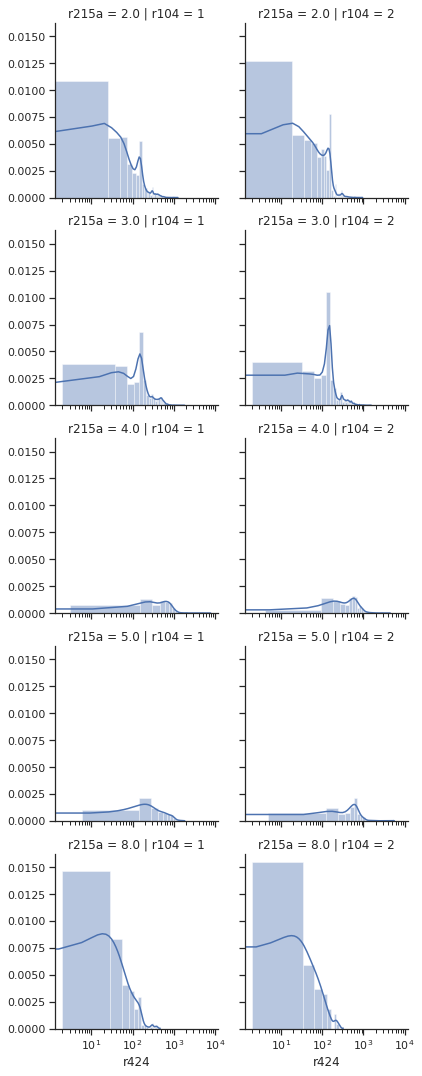

In [18]:
g = sns.FacetGrid(df, col = "r104", row="r215a")
g = g.map(sns.distplot, "r424", hist=True, rug=False).set(xscale='log')

From the graph above it seems that the distribution of salaries between each gender is approximately the same in the different values of the last level of studies approved variable. 

We will explore the relationship between salary (r424), remittance, and age (r106) with a pair plot.

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


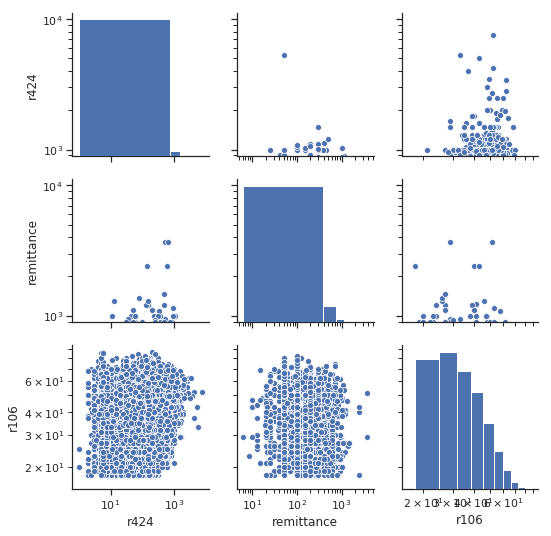

In [19]:
selected_variables = ["r424", "remittance", "r106"]

df_temp = df[selected_variables]

g = sns.pairplot(df_temp).set(xscale='log', yscale='log')

In [20]:
del df_temp

There is no a clear relationship between salary and the variables: age and remittance. Next, we will verify the research questions. 

## Is there gender pay gap in El Salvador?

We propose the following hypothesis: 

$H_0$: The distribution of the salaries between men and women are approximately similar 

$H_1$: The distribution of the salaries between men and women are different 

First of all, we show a histogram of the salary variable in each value of the gender variable (1=Male, 2=Female). 




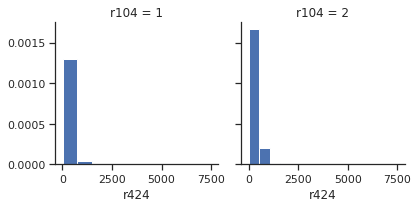

In [21]:
g = sns.FacetGrid(df, col="r104")
g.map(plt.hist, "r424", density=True)

From the plot above it seems that the two distributions are approximately similar, we will prove it using the kolmogorov smirnov test which can be used for testing if two samples comes from the same population. 


In [22]:
male = df.loc[df["r104"] == 1, "r424"].to_numpy()
female = df.loc[df["r104"] == 2, "r424"].to_numpy()
stats.ks_2samp(male, female)

Ks_2sampResult(statistic=0.08796038207501639, pvalue=9.609021240476965e-25)

The p-value is 9.61 and according to the documentation of the package scipy.stats, we reject the null hypothesis that the two samples come from the same distribution if the p-value is below 0.01 in our case the p-value is above 0.01 therefore there is no a gender gap in El Salvador. 

## Is there an association between last level of studies approved and salary in El Salvador?

In order to answer this question we will show a histogram of the salary variable in each value of the last level of studies approved variable ( 2 = 4 to 9 grade, 3 = High School , 4 = University , 5 = Non University Higher Education, 8 = Non response ). 

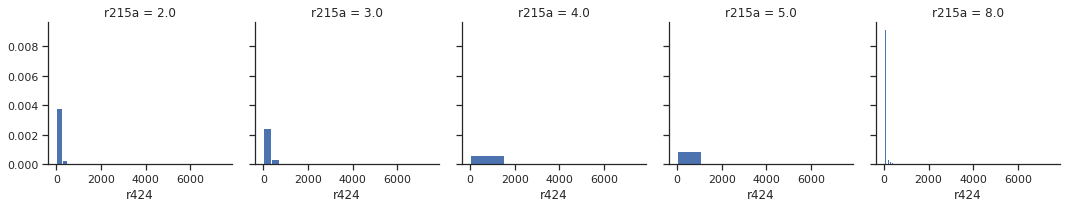

In [23]:
g = sns.FacetGrid(df, col="r215a")
g.map(plt.hist, "r424",  bins=5, density=True)

From the plot above it seems that the distributions are different. We will show descriptive statistics. 

In [24]:
summaries_by_education = df.groupby('r215a').describe()
summaries_by_education["r424"]

,count,mean,std,min,25%,50%,75%,max
r215a,,,,,,,,
2.0,8087.0,99.533517,108.806149,1.0,24.000,66.59,150.000,1207.16
3.0,5124.0,182.144307,163.819018,2.0,70.430,150.00,208.435,1750.00
4.0,1849.0,552.804029,414.851197,3.0,262.880,527.63,729.040,7500.00
5.0,443.0,484.089797,381.532043,4.8,189.515,471.89,650.000,5300.00
8.0,273.0,60.885934,68.520759,2.0,9.000,40.00,90.000,400.00


From the table above people with university (4) and non university higher education (5) have a higher median salary than the other groups. On the other hand people with university and non university higher education have a higher variability in their salaries. 

In this case we cannot use the kolmogorov smirnov test due to [the multiple comparison problem](https://en.wikipedia.org/wiki/Multiple_comparisons_problem) but we can use the kruskal-wallis test in order to test if the different level of education belong to the same population (null hypothesis). 

In [25]:
first_group = df.loc[df["r215a"] == 2, "r424"].to_numpy()
second_group = df.loc[df["r215a"] == 3, "r424"].to_numpy()
third_group = df.loc[df["r215a"] == 4, "r424"].to_numpy()
fourth_group = df.loc[df["r215a"] == 5, "r424"].to_numpy()
fifth_group = df.loc[df["r215a"] == 8, "r424"].to_numpy()

stats.kruskal(first_group, second_group, third_group, fourth_group, fifth_group)

KruskalResult(statistic=4934.468656823844, pvalue=0.0)

The p-value is almost zero, therefore we can conclude that the salaries in the different group of the last level of studies approved are different or in other words there is an association between salary and last level of studies approved.

## What features have the biggest importance on predicting salary in El Salvador

We will build a random forest model and use permutation importance in order to answer this question. 

In [26]:
X = df[['r104', 'r106', 'r107', 'r215a', 'r32601a', 'r32603a', 'r32605a',
       'r32606a', 'r32609a', 'r32610a', 'r32611a', 'r32612a', 'r32617a',
       'r32619a', 'remittance']]
y = df['r424']

# In order to deal with missing value we transform remittance into a binary indicator: 1 if the person receives 
# remittance, 0 otherwise. 

X['remittance'] = X['remittance'].map(lambda x : 0 if np.isnan(x)  else 1)
X['remittance'] = pd.Categorical(X.remittance)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In order to treat categorical variables we will use this function which was provided in the Data Scientist Nanodegree by Udacity. 

In [27]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=False, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [28]:
cat_cols = X.select_dtypes(include=['category']).columns.to_list()

X = create_dummy_df(X, cat_cols, False)

In [29]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .10, random_state=42) 

In order to find the best combination of hyperparameters we will use Random Search which is one of the most widely used strategies for hyper-parameter optimization.

In [30]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [31]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


In [32]:
rf = RandomForestRegressor(random_state=1234)

In [33]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=10, random_state=42, n_jobs = -1)

In [34]:
rf_random.fit(X_train, y_train);

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  5.5min
/opt/conda/lib/python3.6/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 120 tasks     

The best combination of the hyperparameters is shown below: 

In [39]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': True}

We will copy the parameters calculated above in the next cell of code.

In [40]:
model = RandomForestRegressor(random_state=1234, n_estimators  = 600,
                              min_samples_split = 10,
                              min_samples_leaf = 4,
                              max_features = 'sqrt',
                              max_depth = 40,
                              bootstrap = True)



We will fit the model with the whole dataset.

In [41]:
model.fit(X, y);


Random Forest can be used to identify variables that are better predictors. We will use permutation importance in order to measure the importance of the explanatory variables.

In [42]:
perm = PermutationImportance(model, random_state=0).fit(X, y)

colnames = X.columns

eli5.show_weights(perm, feature_names = colnames.tolist())

Weight,Feature
0.1683 ± 0.0084,r215a_4.0
0.1620 ± 0.0143,r106
0.1102 ± 0.0063,r215a_2.0
0.0310 ± 0.0069,r215a_3.0
0.0298 ± 0.0047,r215a_5.0
0.0264 ± 0.0050,r32609a_1
0.0261 ± 0.0051,r32612a_1
0.0240 ± 0.0053,r32609a_2
0.0220 ± 0.0051,r32612a_2
0.0219 ± 0.0036,r107_2.0


We can interpret the numbers in the table above as follows:

The first number in each row shows how much the model performance decreased with a random shuffling.

Like most things in data science, there is some randomness to the exact performance change from a shuffling a column. We measure the amount of randomness in our permutation importance calculation by repeating the process with multiple shuffles. The number after the ± measures how performance varied from one-reshuffling to the next.

From the table above the best predictors are: 

r215a_4.0 : the last level of studies approved is university

r106: age 

r215a_2.0: the last level of studies approved is between 4° and 9° grade of basic education.



## References 

https://math.dartmouth.edu/~lamperti/centralamerica_elsalvador.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

https://towardsdatascience.com/random-forest-in-python-24d0893d51c0

https://www.kaggle.com/dansbecker/permutation-importance
